Passassem de novo por essas partes que eu comentei e percebam que cada parte eu dei um pedacinho de código, a precisou dessa célula aqui pra rodar isso, peguem uma rede simples que pode ser essa que a gente ajustou na sala da CNN com VGG ou pode ser até a mesma rede da aula anterior e adicionem essas questões, essa early stopping, adicionem uma taxa de aprendizado que mude ao longo do tempo e ve se vocês conseguem fazer tudo isso que a gente falou nessa aula. 

Modificações no parametro(analisando a acuracia), testando diferentes configurações da rede, e vá avaliando os resultados.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
amostra_treino = np.random.choice(range(len(x_train)), size=30000, replace=False)
amostra_teste = np.random.choice(range(len(x_test)), size=3000, replace=False)

x_train = x_train[amostra_treino,:]
y_train = y_train[amostra_treino,:]

x_test = x_test[amostra_teste,:]
y_test = y_test[amostra_teste,:]

Classes no dataset:

airplane 0										
automobile 1									
bird	2									
cat	3									
deer	4									
dog	5									
frog	6									
horse		7								
ship	8									
truck 9

In [4]:
def esqueci_as_classes_me_ajuda(pred):
  dicionario = {0: "airplane",
           1: "automobile",
           2: "bird",
           3: "cat",
           4: "deer",
           5: "dog",
           6: "frog",
           7: "horse",
           8: "ship",
           9: "truck"}
  return dicionario[np.argmax(pred)]

In [5]:
y_train

array([[6],
       [4],
       [6],
       ...,
       [8],
       [7],
       [2]], dtype=uint8)

In [6]:
# one hot encoding nos y
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
deer


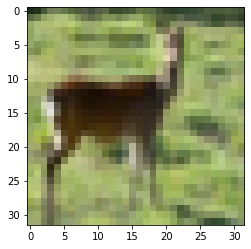

In [7]:
i = np.random.randint(low=0, high=3000)
y_test[i]
plt.imshow(x_test[i])
print(y_test[i])
print(esqueci_as_classes_me_ajuda(y_test[i]))

In [8]:
y_train[]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [9]:
#sapos = np.where(y_train == 6)[0]
one_on_fifth_position_index = []
for i in range(0, len(y_train)):
    if y_train[i][5] == 1:
        one_on_fifth_position_index.append(i)
        
one_on_fifth_position_index 

[23,
 29,
 43,
 54,
 58,
 64,
 69,
 87,
 128,
 131,
 137,
 146,
 151,
 159,
 162,
 164,
 174,
 177,
 189,
 200,
 230,
 232,
 260,
 263,
 278,
 282,
 287,
 297,
 307,
 308,
 310,
 318,
 321,
 334,
 364,
 366,
 370,
 379,
 381,
 413,
 425,
 426,
 429,
 436,
 458,
 462,
 466,
 469,
 486,
 507,
 514,
 523,
 532,
 544,
 545,
 546,
 574,
 577,
 580,
 592,
 607,
 625,
 657,
 664,
 665,
 671,
 688,
 711,
 725,
 739,
 745,
 777,
 791,
 795,
 798,
 807,
 808,
 849,
 859,
 873,
 885,
 900,
 908,
 913,
 925,
 930,
 937,
 945,
 958,
 971,
 972,
 976,
 997,
 1006,
 1008,
 1021,
 1024,
 1025,
 1041,
 1046,
 1057,
 1059,
 1099,
 1112,
 1115,
 1124,
 1126,
 1134,
 1137,
 1148,
 1171,
 1175,
 1197,
 1213,
 1214,
 1219,
 1228,
 1232,
 1236,
 1248,
 1253,
 1256,
 1268,
 1271,
 1288,
 1294,
 1308,
 1316,
 1317,
 1337,
 1357,
 1358,
 1362,
 1371,
 1403,
 1406,
 1413,
 1417,
 1419,
 1424,
 1431,
 1435,
 1438,
 1439,
 1445,
 1474,
 1490,
 1496,
 1510,
 1513,
 1543,
 1546,
 1551,
 1553,
 1555,
 1571,
 1577,
 1

In [10]:
sapos=one_on_fifth_position_index 

In [11]:
print(sapos)

[23, 29, 43, 54, 58, 64, 69, 87, 128, 131, 137, 146, 151, 159, 162, 164, 174, 177, 189, 200, 230, 232, 260, 263, 278, 282, 287, 297, 307, 308, 310, 318, 321, 334, 364, 366, 370, 379, 381, 413, 425, 426, 429, 436, 458, 462, 466, 469, 486, 507, 514, 523, 532, 544, 545, 546, 574, 577, 580, 592, 607, 625, 657, 664, 665, 671, 688, 711, 725, 739, 745, 777, 791, 795, 798, 807, 808, 849, 859, 873, 885, 900, 908, 913, 925, 930, 937, 945, 958, 971, 972, 976, 997, 1006, 1008, 1021, 1024, 1025, 1041, 1046, 1057, 1059, 1099, 1112, 1115, 1124, 1126, 1134, 1137, 1148, 1171, 1175, 1197, 1213, 1214, 1219, 1228, 1232, 1236, 1248, 1253, 1256, 1268, 1271, 1288, 1294, 1308, 1316, 1317, 1337, 1357, 1358, 1362, 1371, 1403, 1406, 1413, 1417, 1419, 1424, 1431, 1435, 1438, 1439, 1445, 1474, 1490, 1496, 1510, 1513, 1543, 1546, 1551, 1553, 1555, 1571, 1577, 1585, 1602, 1611, 1620, 1621, 1633, 1643, 1664, 1669, 1677, 1678, 1695, 1706, 1737, 1741, 1744, 1763, 1775, 1776, 1781, 1795, 1799, 1806, 1818, 1819, 1831, 18

In [12]:
r = np.random.randint(0, 5000)
print('sapo numero ' + str(r))
plt.imshow(x_train[sapos[r]])
print('observe que belo sapo')

sapo numero 3966


IndexError: list index out of range

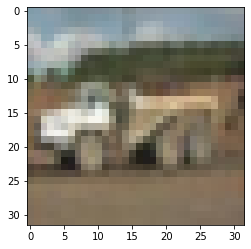

In [13]:
plt.imshow(x_train[501])

In [ ]:
plt.imshow(x_train[501,:,:,0])

In [ ]:
# Tentando modelo qualquer
model = keras.Sequential()
model.add(keras.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(64, kernel_size=3, strides=1, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Sobre a convolução:
```
Input shape:
  4+D tensor with shape: batch_shape + (rows, cols, channels) if
    data_format='channels_last'.
```

In [ ]:
model.summary() # ixi, tá pequena!

In [ ]:
# rede maiorzinha com várias convoluções
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# compile model
opt = keras.optimizers.Adagrad()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# callbacks: tensorboard e early stopping
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + (datetime.datetime.now() + datetime.timedelta(hours=-3)).strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, verbose=2
)

In [ ]:
# fit model
model.fit(x_train,
          y_train,
          epochs=100,
          batch_size=128,
          validation_data=(x_test, y_test),
          callbacks=[tb_callback] #adicionar stopper para fazer early stopping
          )

In [ ]:
model.save('CNN_70acc_47accval.h5')

In [ ]:
i = 1007
pred = model.predict(tf.expand_dims(x_test[i], 0))
plt.imshow(x_test[i])
print(esqueci_as_classes_me_ajuda(pred))

Papo chato sobre dimensões:

The first dimension is the batch size, it's None because it can vary depending on how many examples you give for training. (If you defined the batch size explicitly, then the number you defined will appear instead of None)

In [ ]:
# Given the input shape, all other shapes are results of layers calculations.
model.output_shape

In [ ]:
y_train[0].shape

In [ ]:
model(x_train[0]) # não funciona porque ele espera um tensor e eu to dando pra ele um ndarray
# O keras sempre vai esperar um tensor onde a primeira dimensão é o batch size
# pra consertar, usei uma função do tensorflow que pega um vetor [x, y] e adiciona uma dimensão
# extra sem nada, ou seja, transforma ele em [1, x, y]

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

### Transfer learning com a VGG16

https://keras.io/api/applications/vgg/

*Note: each Keras Application expects a specific kind of input preprocessing. For VGG16, call tf.keras.applications.vgg16.preprocess_input on your inputs before passing them to the model.*

In [ ]:
from keras.applications import vgg16

# VGG16 was designed to work on 224 x 224 pixel input images sizes (base é a imagenet)
# Aqui vamos usar para as imagens 32 x 32 do CIFAR10

# Loads the VGG16 model without the top or FC layers
vgg16_model = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

In [ ]:
model2 = keras.Sequential()
for layer in vgg16_model.layers:
  model2.add(layer)

In [ ]:
model2.summary()

In [ ]:
# Congelando os pesos que não vou treinar
for layer in model2.layers:
  layer.trainable = False

In [ ]:
model2.summary()

In [ ]:
# Adicionando mais uns layerzinhos no final, atenção pra saída que tem que ser com 10 classes
model2.add(layers.Flatten())
model2.add(layers.Dense(300, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

In [ ]:
model2.output

In [ ]:
# callbacks: early stopping
stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=20, verbose=2
)

In [ ]:
# compile model
opt = keras.optimizers.SGD()
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

In [ ]:
# nunca esquecer do pré-processamento!
input_test = tf.keras.applications.vgg16.preprocess_input(x_test)
input_train = tf.keras.applications.vgg16.preprocess_input(x_train)

In [ ]:
# fit model
model2.fit(input_train,
           y_train,
           epochs=50,
           batch_size=32,
           validation_data=(input_test, y_test))
           #, callbacks=[stopper])

In [ ]:
model2.save('vgg16_modificada.h5')

In [ ]:
i = np.random.randint(0, len(x_test))
pred = model2.predict(
    tf.expand_dims(
        tf.keras.applications.vgg16.preprocess_input(x_test[i]), 0
        )
    )

print(esqueci_as_classes_me_ajuda(pred))
plt.imshow(x_test[i])
print(i)

### Usando a VGG19 "crua" para descrever uma imagem

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19

In [ ]:
img = keras.preprocessing.image.load_img('image.jpeg', target_size=(224, 224)) # https://www.pexels.com/pt-br/foto/quintal-banco-assento-tribunal-6638801/
img_array = img_to_array(img)
img_array = img_array.reshape((1, 224, 224, 3))
img_zoada = preprocess_input(img_array)

In [ ]:
plt.imshow(img)
plt.imshow(img_zoada[0,:,:,:]) # para ver a imagem pré processada pra vgg

In [ ]:
model = VGG19()
yhat = model.predict(img_zoada)
label = decode_predictions(yhat, top = 10)
label

adicionar imagem tirada da camera, ao vivo,  e fazer o mesmo!
